#### Reimplement Task 1

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
import PyPDF2

#Extracting
def extract_text_from_pdf(pdf_file):
    text = ""
    with open(pdf_file, 'rb') as file:
        reader = PyPDF2.PdfReader(file)  # Use PdfReader instead of PdfFileReader
        for page_num in range(len(reader.pages)):  # reader.pages gives a list of pages
            page = reader.pages[page_num]
            text += page.extract_text()
    return text

book1 = extract_text_from_pdf("/content/drive/MyDrive/1. Harry Potter and the Philosopher's Stone.pdf")
book2 = extract_text_from_pdf("/content/drive/MyDrive/2. Harry Potter and the Chamber of Secrets.pdf")
book3 = extract_text_from_pdf("/content/drive/MyDrive/3. Harry Potter and the Prisoner of Azkaban.pdf")
book4 = extract_text_from_pdf("/content/drive/MyDrive/4. Harry Potter and the Goblet.pdf")

In [3]:
# Text Preprocessing:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

nltk.download('punkt')
nltk.download('stopwords')

def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
    return tokens

processed_text1 = preprocess_text(book1)
processed_text2 = preprocess_text(book2)
processed_text3 = preprocess_text(book3)
processed_text4 = preprocess_text(book4)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
import time
from sklearn.feature_extraction.text import CountVectorizer

def ensure_string(text):
    if isinstance(text, list):
        return ' '.join(text)

def build_term_document_matrix(documents):
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(documents)
    return X, vectorizer.get_feature_names_out()

documents = [
    ensure_string(processed_text1),
    ensure_string(processed_text2),
    ensure_string(processed_text3),
    ensure_string(processed_text4)
]

start_time = time.time()

term_document_matrix, terms = build_term_document_matrix(documents)

execution_time = time.time() - start_time


print("Term-Document Matrix (Raw Frequency):")
print(term_document_matrix.toarray())

print("\nTerms (Features):")
print(terms)

print(f"\nExecution Time: {execution_time} seconds")

Term-Document Matrix (Raw Frequency):
[[ 1  1  1 ...  2  0  1]
 [ 1  1  1 ...  0  0  0]
 [ 1  1  1 ...  3  0  0]
 [ 1  1  1 ... 11  1  3]]

Terms (Features):
['10' '100' '101' ... 'zooming' 'éclair' 'éclairs']

Execution Time: 0.4268815517425537 seconds


In [5]:
# Euclidean Distance
from sklearn.metrics.pairwise import euclidean_distances

euclidean_dist = euclidean_distances(term_document_matrix)
print("Euclidean Distance Matrix:\n", euclidean_dist)

Euclidean Distance Matrix:
 [[   0.          916.1129843  1463.21256146 3420.60564813]
 [ 916.1129843     0.         1134.279507   2952.26082859]
 [1463.21256146 1134.279507      0.         2456.55042692]
 [3420.60564813 2952.26082859 2456.55042692    0.        ]]


In [6]:
# Consine similarity
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(term_document_matrix)
print("Cosine Similarity Matrix:\n", cosine_sim)

Cosine Similarity Matrix:
 [[1.         0.94329679 0.9416178  0.93467331]
 [0.94329679 1.         0.95078986 0.95214857]
 [0.9416178  0.95078986 1.         0.94577085]
 [0.93467331 0.95214857 0.94577085 1.        ]]


In [7]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import TruncatedSVD

documents = [' '.join(processed_text1),
             ' '.join(processed_text2),
             ' '.join(processed_text3),
             ' '.join(processed_text4)]

representative_words = ['wizard', 'magical', 'harry', 'spells', 'witch', 'journey']

# Create a CountVectorizer with the selected words
vectorizer = CountVectorizer(vocabulary = representative_words)
term_document_matrix = vectorizer.fit_transform(documents).toarray()

df = pd.DataFrame(term_document_matrix, columns = representative_words)
print("Term-Document Matrix for Selected Words:\n", df)

Term-Document Matrix for Selected Words:
    wizard  magical  harry  spells  witch  journey
0      42       11   1308       6     12       11
1      47       16   1633       9     16        5
2      39       31   2035       2     42        6
3      83      125   3134      24     37       10


In [8]:
# Compute cosine similarity
cosine_sim = cosine_similarity(term_document_matrix)
print("Cosine Similarity Matrix for Selected Words:\n", cosine_sim)

Cosine Similarity Matrix for Selected Words:
 [[1.         0.99997861 0.99980603 0.99946822]
 [0.99997861 1.         0.9998701  0.99954149]
 [0.99980603 0.9998701  1.         0.999609  ]
 [0.99946822 0.99954149 0.999609   1.        ]]


In [9]:
# Reduce dimensionality using Truncated SVD
n_components = 2
svd = TruncatedSVD(n_components=n_components)
reduced_embeddings = svd.fit_transform(term_document_matrix)

print("Reduced Embeddings:\n", reduced_embeddings)

Reduced Embeddings:
 [[1308.55565611  -23.64973942]
 [1633.60579063  -26.99254366]
 [2035.79150708  -26.59805943]
 [3137.64510112   41.17428047]]


#### Main task 2: Implement tf-idf to replace the raw frequency of the term-doc matrix in Question 1. Recompute the similarity between 4 Harry Potter books with cosine similarity metric.

The part combines both ways for easy comparison

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Preprocessed documents (from your previous code)
documents = [' '.join(processed_text1),
             ' '.join(processed_text2),
             ' '.join(processed_text3),
             ' '.join(processed_text4)]

# 1. Raw Frequency (CountVectorizer)
count_vectorizer = CountVectorizer()
count_matrix = count_vectorizer.fit_transform(documents).toarray()

# Calculate Cosine Similarity with Raw Frequency
cosine_sim_raw = cosine_similarity(count_matrix)

# Convert to DataFrame for better readability
count_df = pd.DataFrame(count_matrix, columns=count_vectorizer.get_feature_names_out())

print("Term-Document Matrix with Raw Frequency:")
print(count_df)
print("\nCosine Similarity Matrix with Raw Frequency:")
print(pd.DataFrame(cosine_sim_raw, index=[f'Book {i+1}' for i in range(4)], columns=[f'Book {i+1}' for i in range(4)]))


# 2. TF-IDF
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(documents).toarray()

# Calculate Cosine Similarity with TF-IDF
cosine_sim_tfidf = cosine_similarity(tfidf_matrix)

# Convert to DataFrame for better readability
tfidf_df = pd.DataFrame(tfidf_matrix, columns=tfidf_vectorizer.get_feature_names_out())

print("\nTF-IDF Matrix:")
print(tfidf_df)
print("\nCosine Similarity Matrix with TF-IDF:")
print(pd.DataFrame(cosine_sim_tfidf, index=[f'Book {i+1}' for i in range(4)], columns=[f'Book {i+1}' for i in range(4)]))


Term-Document Matrix with Raw Frequency:
   10  100  101  102  103  104  105  106  107  108  ...  zombie  zonko  \
0   1    1    1    1    1    1    1    1    0    1  ...       2      0   
1   1    1    1    1    1    1    1    1    0    1  ...       0      0   
2   1    1    1    1    1    1    1    1    0    1  ...       1     11   
3   1    1    1    1    1    1    1    0    1    1  ...       0      1   

   zontal  zoo  zoological  zoom  zoomed  zooming  éclair  éclairs  
0       0    7           0     1       1        2       0        1  
1       0    2           0     0       2        0       0        0  
2       0    0           0     0       9        3       0        0  
3       1    0           1     4       9       11       1        3  

[4 rows x 15458 columns]

Cosine Similarity Matrix with Raw Frequency:
          Book 1    Book 2    Book 3    Book 4
Book 1  1.000000  0.943297  0.941618  0.934673
Book 2  0.943297  1.000000  0.950790  0.952149
Book 3  0.941618  0.950790  1.

- Raw Frequency: This matrix is based on the frequency of the words in each document, but does not take into account the importance of the word in each document, resulting in common words that can blur the differences between books.
=> Tends to give higher similarity values for documents that share a lot of common words, even if those words are not particularly important or representative.
- TF-IDF:When using TF-IDF, words that appear more in one document but less in other documents will have a higher weight. This helps improve the distinction between books
=> Lowers the similarity for common words and focuses more on terms that are specific to a given document, resulting in a more meaningful similarity measure.

#### 3. Implement Pointwise Mutual Information (PMI) to replace the raw frequency of the term-doc matrix in Question 1. Recompute the similarity between 4 Harry Potter books with cosine similarity metric.

In [18]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

documents = [' '.join(processed_text1),
             ' '.join(processed_text2),
             ' '.join(processed_text3),
             ' '.join(processed_text4)]

count_vectorizer = CountVectorizer()
count_matrix = count_vectorizer.fit_transform(documents).toarray()
N = len(documents)

term_freq = count_matrix.sum(axis=0)  # term_freq

pmi_matrix = np.zeros(count_matrix.shape)

for i in range(count_matrix.shape[0]):
    for j in range(count_matrix.shape[1]):
        if count_matrix[i, j] > 0:
            p_word = term_freq[j] / (N * np.sum(term_freq))
            p_doc = 1 / N
            p_word_doc = count_matrix[i, j] / np.sum(term_freq)

            pmi_value = np.log2(p_word_doc / (p_word * p_doc)) if p_word_doc > 0 else 0
            pmi_matrix[i, j] = max(pmi_value, 0)

cosine_sim_pmi = cosine_similarity(pmi_matrix)

pmi_df = pd.DataFrame(pmi_matrix, columns=count_vectorizer.get_feature_names_out())

print("\nPMI Matrix:")
print(pmi_df)

print("\nCosine Similarity Matrix with PMI:")
print(pd.DataFrame(cosine_sim_pmi, index=[f'Book {i+1}' for i in range(N)], columns=[f'Book {i+1}' for i in range(N)]))


PMI Matrix:
    10  100  101  102  103  104  105       106  107  108  ...    zombie  \
0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.415037  0.0  2.0  ...  3.415037   
1  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.415037  0.0  2.0  ...  0.000000   
2  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.415037  0.0  2.0  ...  2.415037   
3  2.0  2.0  2.0  2.0  2.0  2.0  2.0  0.000000  4.0  2.0  ...  0.000000   

      zonko  zontal       zoo  zoological      zoom    zoomed   zooming  \
0  0.000000     0.0  3.637430         0.0  1.678072  0.000000  1.000000   
1  0.000000     0.0  1.830075         0.0  0.000000  0.607683  0.000000   
2  3.874469     0.0  0.000000         0.0  0.000000  2.777608  1.584963   
3  0.415037     4.0  0.000000         4.0  3.678072  2.777608  3.459432   

   éclair   éclairs  
0     0.0  2.000000  
1     0.0  0.000000  
2     0.0  0.000000  
3     4.0  3.584963  

[4 rows x 15458 columns]

Cosine Similarity Matrix with PMI:
          Book 1    Book 2    Book 3    Book 4
Book 1  1.000000

- The raw frequency matrix yields high similarity scores because many common words (which appear frequently in all books) dominate the similarity calculation.
- The PMI matrix, on the other hand, adjusts for word significance by giving more weight to unique or rare words, leading to much lower similarity scores. This suggests that while the books may share common vocabulary, they differ significantly in terms of distinctive content.

In [19]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

# Step 1: Build the Term-Document Matrix with Raw Frequency
def build_term_document_matrix(documents):
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(documents)
    return X.toarray(), vectorizer.get_feature_names_out()

# Step 2: Build the Term-Document Matrix with TF-IDF
def build_tfidf_matrix(documents):
    vectorizer = TfidfVectorizer()
    X = vectorizer.fit_transform(documents)
    return X.toarray(), vectorizer.get_feature_names_out()

# Step 3: Compute PMI for the Term-Document Matrix
def compute_pmi(term_doc_matrix):
    total_word_count = np.sum(term_doc_matrix)
    word_freq = np.sum(term_doc_matrix, axis=0)
    doc_freq = np.sum(term_doc_matrix, axis=1)
    joint_prob = term_doc_matrix / total_word_count
    pmi_matrix = np.zeros_like(term_doc_matrix, dtype=float)

    for i in range(term_doc_matrix.shape[0]):
        for j in range(term_doc_matrix.shape[1]):
            if term_doc_matrix[i, j] > 0:
                p_w = word_freq[j] / total_word_count
                p_d = doc_freq[i] / total_word_count
                pmi_value = np.log2(joint_prob[i, j] / (p_w * p_d))
                pmi_matrix[i, j] = max(pmi_value, 0)  # Positive PMI (PPMI)

    return pmi_matrix

# Step 4: Cosine Similarity for each method
def compute_cosine_similarity(matrix):
    return cosine_similarity(matrix)

# Step 5: Integrate the steps and compare the results
documents = [
    ' '.join(processed_text1),
    ' '.join(processed_text2),
    ' '.join(processed_text3),
    ' '.join(processed_text4)
]

# Display Cosine Similarity Matrices
print("\nCosine Similarity with Raw Frequency:")
df_cosine_raw = pd.DataFrame(cosine_sim_raw, index=[f'Book {i+1}' for i in range(4)], columns=[f'Book {i+1}' for i in range(4)])
print(df_cosine_raw)

print("\nCosine Similarity with TF-IDF:")
df_cosine_tfidf = pd.DataFrame(cosine_sim_tfidf, index=[f'Book {i+1}' for i in range(4)], columns=[f'Book {i+1}' for i in range(4)])
print(df_cosine_tfidf)

print("\nCosine Similarity with PMI:")
df_cosine_pmi = pd.DataFrame(cosine_sim_pmi, index=[f'Book {i+1}' for i in range(4)], columns=[f'Book {i+1}' for i in range(4)])
print(df_cosine_pmi)



Cosine Similarity with Raw Frequency:
          Book 1    Book 2    Book 3    Book 4
Book 1  1.000000  0.943297  0.941618  0.934673
Book 2  0.943297  1.000000  0.950790  0.952149
Book 3  0.941618  0.950790  1.000000  0.945771
Book 4  0.934673  0.952149  0.945771  1.000000

Cosine Similarity with TF-IDF:
          Book 1    Book 2    Book 3    Book 4
Book 1  1.000000  0.924907  0.920044  0.909882
Book 2  0.924907  1.000000  0.922645  0.923897
Book 3  0.920044  0.922645  1.000000  0.913766
Book 4  0.909882  0.923897  0.913766  1.000000

Cosine Similarity with PMI:
          Book 1    Book 2    Book 3    Book 4
Book 1  1.000000  0.272526  0.284263  0.283266
Book 2  0.272526  1.000000  0.317365  0.321567
Book 3  0.284263  0.317365  1.000000  0.351577
Book 4  0.283266  0.321567  0.351577  1.000000


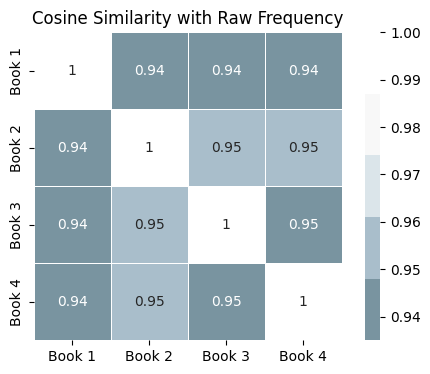

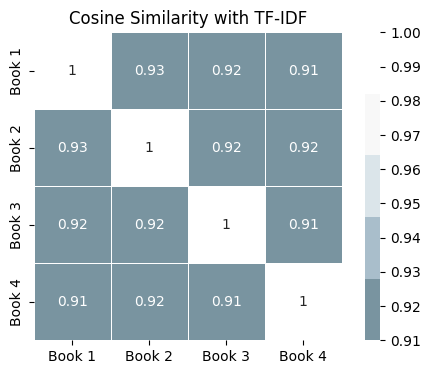

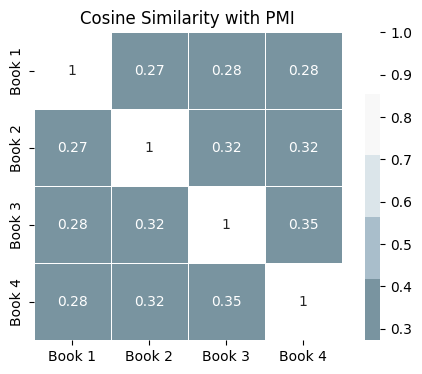

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Example cosine similarity matrices (replace with your actual data)
cosine_sim_raw = np.array([[1.000, 0.943, 0.942, 0.935],
                           [0.943, 1.000, 0.951, 0.952],
                           [0.942, 0.951, 1.000, 0.946],
                           [0.935, 0.952, 0.946, 1.000]])

cosine_sim_tfidf = np.array([[1.000, 0.925, 0.920, 0.910],
                             [0.925, 1.000, 0.923, 0.924],
                             [0.920, 0.923, 1.000, 0.914],
                             [0.910, 0.924, 0.914, 1.000]])

cosine_sim_pmi = np.array([[1.000, 0.273, 0.284, 0.283],
                           [0.273, 1.000, 0.318, 0.322],
                           [0.284, 0.317, 1.000, 0.352],
                           [0.283, 0.322, 0.351, 1.000]])

# Labels for the documents
labels = [f'Book {i+1}' for i in range(4)]

# Create DataFrames for each similarity matrix
df_cosine_raw = pd.DataFrame(cosine_sim_raw, index=labels, columns=labels)
df_cosine_tfidf = pd.DataFrame(cosine_sim_tfidf, index=labels, columns=labels)
df_cosine_pmi = pd.DataFrame(cosine_sim_pmi, index=labels, columns=labels)

# Define the custom color palette
cmap = sns.color_palette(["#7994a0", "#a9becb", "#dbe5ea", "#f8f8f8", "#ffffff"])

# Function to plot heatmap
def plot_heatmap(df, title):
    plt.figure(figsize=(6, 4))
    sns.heatmap(df, annot=True, cmap=cmap, linewidths=0.5, square=True, cbar=True)
    plt.title(title)
    plt.show()

# Plot heatmaps for each similarity method
plot_heatmap(df_cosine_raw, "Cosine Similarity with Raw Frequency")
plot_heatmap(df_cosine_tfidf, "Cosine Similarity with TF-IDF")
plot_heatmap(df_cosine_pmi, "Cosine Similarity with PMI")
